# HR Analytics
### Goal :
Data Analyst - You are required to report the attributes of attrition and what other patterns you can recognise related attrition. The results thus obtained will be used by the management to understand what changes they should make to their workplace, in order to get most of their employees to stay.

#### Stakeholders:
Stephen Cole & Alex Naylor

In [1]:
#Connect to PostgreSQL using SQLAlchemy
from sqlalchemy import create_engine
hostname= 'localhost'
database='JCW HR Analytics'
username='postgres'
pwd='sql1234'
port_id='5432'

#A lonf string that contains the necessary Postgres Login information
postgres_str = ('postgresql://{username}:{password}@{ipaddress}:{port}/{dbname}'.format(username=username,password=pwd,
                                                                                        ipaddress=hostname,port=port_id,
                                                                                        dbname=database))
#create the connection
cnx= create_engine(postgres_str)

In [2]:
import pandas as pd

In [3]:
df_employee = pd.read_sql_query ('''SELECT * FROM employee_survey_data;''',cnx)

In [4]:
df_general = pd.read_sql_query ('''SELECT * FROM general_data;''',cnx)

In [5]:
df_manager = pd.read_sql_query ('''SELECT * FROM manager_survey_data;''',cnx)

In [6]:
df_employee.info()
#There are many null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB


In [7]:
df_general.info()
##There are many null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [8]:
df_manager.info()
#no null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB


In [9]:
#'EmployeeID' is the common field in all the 3 dataframes. Lets join all the three dataframes into a single data frame.
#New data frame should have (3+24+4)-2 = 29 columns and 4410 rows

In [10]:
df_eg = pd.merge(df_employee,df_general,on='EmployeeID')

In [11]:
df = pd.merge(df_eg,df_manager,on='EmployeeID')

In [12]:
df.info()
#this is merged df with 4410 rows and 29 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
 4   Age                      4410 non-null   int64  
 5   Attrition                4410 non-null   object 
 6   BusinessTravel           4410 non-null   object 
 7   Department               4410 non-null   object 
 8   DistanceFromHome         4410 non-null   int64  
 9   Education                4410 non-null   int64  
 10  EducationField           4410 non-null   object 
 11  EmployeeCount            4410 non-null   int64  
 12  Gender                   4410 non-null   object 
 13  JobLevel                 4410 non-null   int64  
 14  JobRole                 

In [13]:
df.isna().sum()
#identifying missing values

EmployeeID                  0
EnvironmentSatisfaction    25
JobSatisfaction            20
WorkLifeBalance            38
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [14]:
print(df.shape)

(4410, 29)


In [15]:
# The Columns that have missing values are 
#'EnvironmentSatisfaction'-25, 
#'JobSatisfaction'-20, 
#'WorkLifeBalance'-38,
#'NumCompaniesWorked'-19, 
#'TotalWorkingYears'-9 

In [16]:
#EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance are numeric categorical columns with values as 1,2,3 or 4.
#Find mode for these columns

In [17]:
df['EnvironmentSatisfaction'].mode()

0    3.0
Name: EnvironmentSatisfaction, dtype: float64

In [18]:
df['JobSatisfaction'].mode()

0    4.0
Name: JobSatisfaction, dtype: float64

In [19]:
df['WorkLifeBalance'].mode()

0    3.0
Name: WorkLifeBalance, dtype: float64

In [20]:
#Imputation
#Let's fill the missing values with the most common class(mode).

In [21]:
df.fillna({'EnvironmentSatisfaction': 3.0, 'JobSatisfaction': 4.0, 'WorkLifeBalance': 3.0}, inplace=True)

In [22]:
df.isna().sum()
#recheck if the missing values for EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance are filled

EmployeeID                  0
EnvironmentSatisfaction     0
JobSatisfaction             0
WorkLifeBalance             0
Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
JobInvolvement              0
PerformanceRating           0
dtype: int64

In [23]:
#NumCompaniesWorked,TotalWorkingYears are continuous numeric columns.
#Find median for these columns

In [24]:
df['NumCompaniesWorked'].median()

2.0

In [25]:
df['TotalWorkingYears'].median()

10.0

In [26]:
#Imputation
#Let's fill the missing values with the median.

In [27]:
df.fillna({'NumCompaniesWorked': 2.0, 'TotalWorkingYears': 10.0}, inplace=True)

In [28]:
df.isna().sum()
#recheck if the missing values for NumCompaniesWorked,TotalWorkingYears are filled

EmployeeID                 0
EnvironmentSatisfaction    0
JobSatisfaction            0
WorkLifeBalance            0
Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EmployeeCount              0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StandardHours              0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
JobInvolvement             0
PerformanceRating          0
dtype: int64

In [29]:
#All the missing values are treated

In [30]:
#Check duplicate values

In [31]:
df.duplicated().sum()
#all the records are unique

0

In [32]:
#lets find proportion of Attrition
print(df.Attrition.value_counts())

No     3699
Yes     711
Name: Attrition, dtype: int64


In [33]:
#Data Visualisation

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

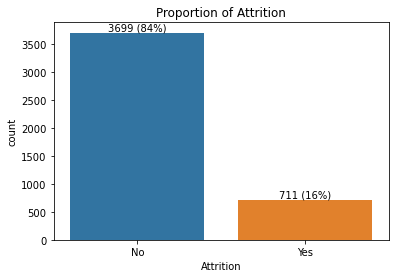

In [35]:
plt.title('Proportion of Attrition')

ax = sns.countplot(x=df['Attrition'],
                   order=df['Attrition'].value_counts().index);

abs_values = df['Attrition'].value_counts(ascending=False)
rel_values = df['Attrition'].value_counts(ascending=False, normalize=True).values * 100
lbls = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_values, rel_values)]

ax.bar_label(container=ax.containers[0], labels=lbls);

#Class is imbalanced

In [36]:
#Annual Attrition Rate=(Number of Leavers/Number of Total Employees)*100
#Annual Attrition Rate for our dataset=(711/4410)*100
#Attrition rate is 16%

In [37]:
#Data Visualisation, analysing different features

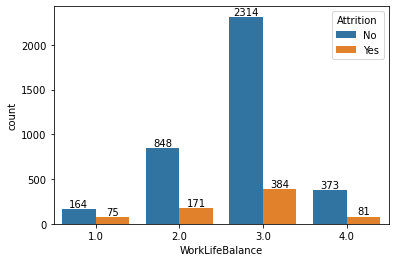

In [38]:
#1.Feature- Work Life Balance.
# Key (1-Low, 2-Medium, 3-High, 4-Very High)
ax = sns.countplot(x='WorkLifeBalance', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [39]:
#As the class is imbalanced that attrition-No to attrition-Yes ratio is approximately 5:1 
#It will be difficult to compare and draw conclusions based on the absolute values alone.
#Hence,I decided to calculate the attrition rate for each class of the feature.

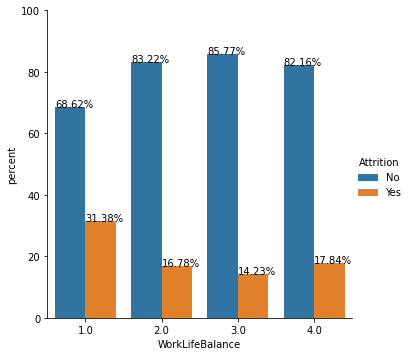

In [40]:
#plotting the attrition rate for each class in the feature 'WorkLifeBalance'
x,y = 'WorkLifeBalance', 'Attrition'

df1 = df.groupby(x)[y].value_counts(normalize=True)
df1 = df1.mul(100)
df1 = df1.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df1)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [41]:
#As we compare attrition rate for each class of WorkLifeBalance feature, we observe that percentage of class 1 is highest.
#This indicates that people are more likely to leave if they feel that they dont have a good work life balance.

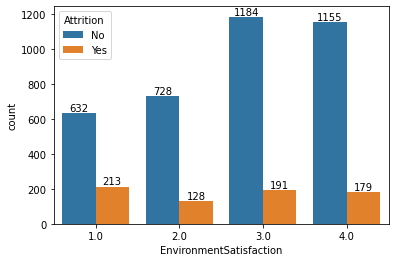

In [42]:
#2.Feature- Environment satisfaction.
# Key (1-Low, 2-Medium, 3-High, 4-Very High)
ax = sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

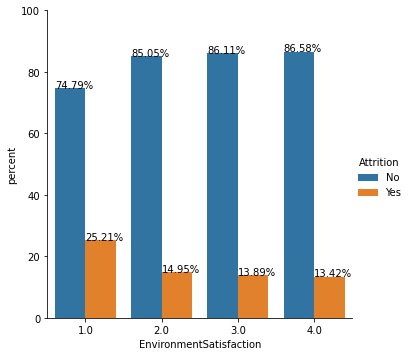

In [43]:
#plotting the attrition rate for each class in the feature 'EnvironmentSatisfaction'
x,y = 'EnvironmentSatisfaction', 'Attrition'

df2 = df.groupby(x)[y].value_counts(normalize=True)
df2 = df2.mul(100)
df2 = df2.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df2)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [44]:
#As we compare attrition rate for each class of EnvironmentSatisfaction feature,
#we observe that percentage of class 1 is highest.
#And on observing the countplot,we see considerable amount of people voted '1'.
#This can be considered as a strong reason for attrition.

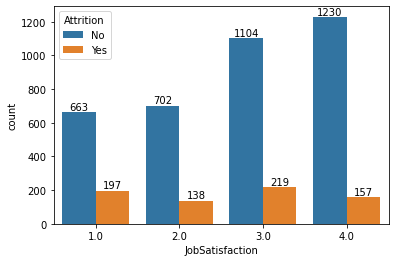

In [45]:
#3.Feature- Job Satisfaction.
# Key (1-Low, 2-Medium, 3-High, 4-Very High)
ax = sns.countplot(x='JobSatisfaction', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

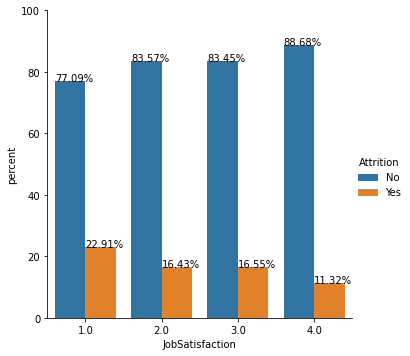

In [46]:
#plotting the attrition rate for each class in the feature 'JobSatisfaction'
x,y = 'JobSatisfaction', 'Attrition'

df3 = df.groupby(x)[y].value_counts(normalize=True)
df3 = df3.mul(100)
df3 = df3.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df3)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [47]:
#As we compare attrition rate for each class of JobSatisfaction feature,
#we observe that percentage of class 1 is highest.
#And on observing the countplot,we see considerable amount of people voted '1'.
#This can be considered as a strong reason for attrition.

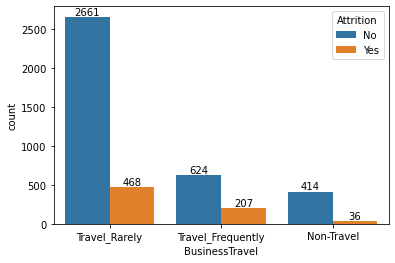

In [48]:
#4.Feature- BusinessTravel.
# Key-How frequently the employees travelled for business purposes in the last year
ax = sns.countplot(x='BusinessTravel', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

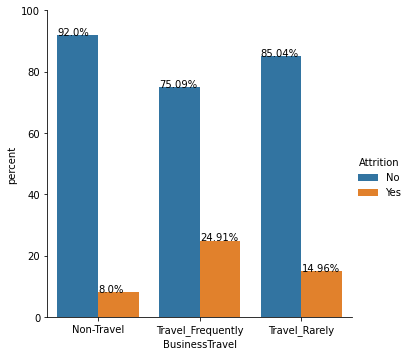

In [49]:
#plotting the attrition rate for each class in the feature 'BusinessTravel'
x,y = 'BusinessTravel', 'Attrition'

df4 = df.groupby(x)[y].value_counts(normalize=True)
df4 = df4.mul(100)
df4 = df4.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df4)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [50]:
#As we compare attrition rate for each class of BusinessTravel,
#we observe that percentage of Travel frequenty is the highest followed by travel rarely.
#Frequent travel for business might be a strong reason for attrition.

(array([0, 1, 2]),
 [Text(0, 0, 'Sales'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Human Resources')])

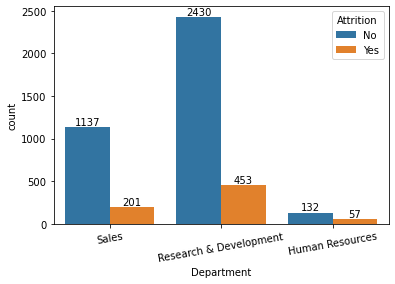

In [51]:
#5.Feature- Department
# Key-Department in company
ax = sns.countplot(x='Department', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
plt.xticks(rotation=10)

(array([0, 1, 2]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Research & Development'),
  Text(2, 0, 'Sales')])

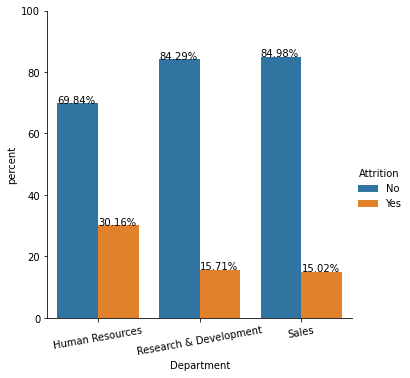

In [52]:
#plotting the attrition rate for each class in the feature 'Department'
x,y = 'Department', 'Attrition'

df5 = df.groupby(x)[y].value_counts(normalize=True)
df5 = df5.mul(100)
df5 = df5.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df5)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
plt.xticks(rotation=10)

In [53]:
#As we compare attrition rate for each class of Department,
#we observe that percentage of Human Resources is the highest.
#There are low no. of people in the HR department compared to others and the attrition rate is 30.16%.
#HR department might be overworking and this could be the reason for attrition
#This department should be focussed on to find the reasons for high attrition.

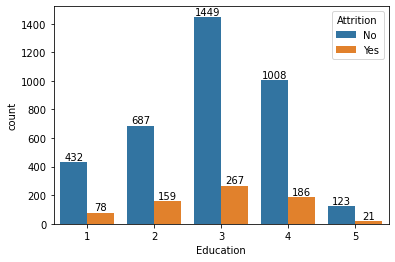

In [54]:
#6.Feature- Education
# Key:(1-Below College, 2-College, 3-Bachelor, 4-Master, 5-Doctor)
ax = sns.countplot(x='Education', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

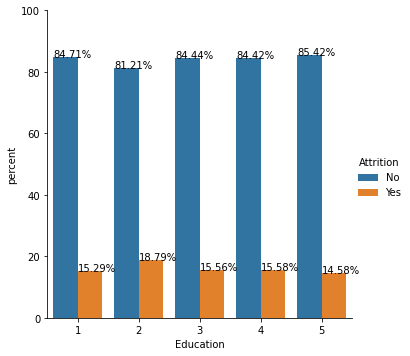

In [55]:
#plotting the attrition rate for each class in the feature 'Education'
x,y = 'Education', 'Attrition'

df6 = df.groupby(x)[y].value_counts(normalize=True)
df6 = df6.mul(100)
df6 = df6.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df6)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [56]:
# Education level does not seem to be a strong reason contributing to the attrition. 

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Life Sciences'),
  Text(1, 0, 'Other'),
  Text(2, 0, 'Medical'),
  Text(3, 0, 'Marketing'),
  Text(4, 0, 'Technical Degree'),
  Text(5, 0, 'Human Resources')])

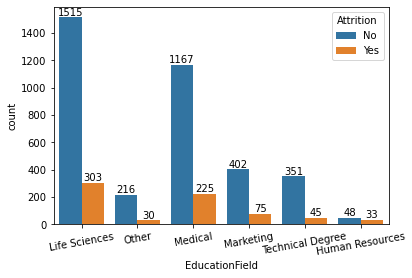

In [57]:
#7.Feature- EducationField
# Key:Field of education
ax = sns.countplot(x='EducationField', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=10)

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Human Resources'),
  Text(1, 0, 'Life Sciences'),
  Text(2, 0, 'Marketing'),
  Text(3, 0, 'Medical'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Technical Degree')])

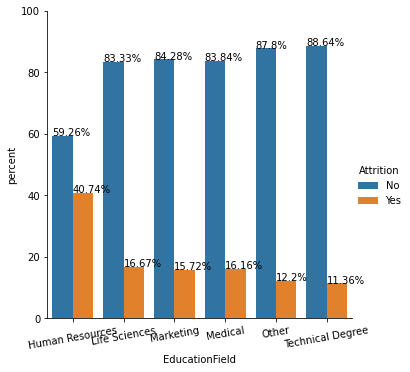

In [58]:
#plotting the attrition rate for each class in the feature 'EducationField'
x,y = 'EducationField', 'Attrition'

df7 = df.groupby(x)[y].value_counts(normalize=True)
df7 = df7.mul(100)
df7 = df7.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df7)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.xticks(rotation=10)

In [59]:
#The percentage of Human Resources is the highest with 40.74%.
#Similar results were obtained with the HR Department feature.
#There seem to be low no. of people in the HR department.
#HR department might be overworking and this could be the reason for attrition
#This department should be focussed on to find the reasons for high attrition.

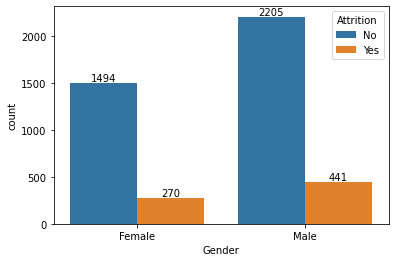

In [60]:
#8.Feature- Gender
# Key:Gender of employee
ax = sns.countplot(x='Gender', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

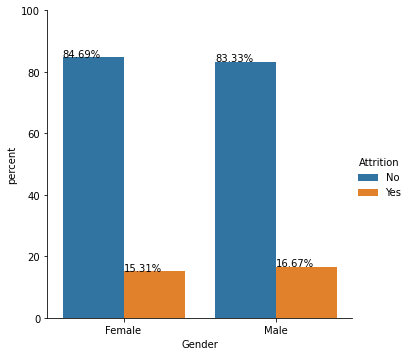

In [61]:
#plotting the attrition rate for each class in the feature 'Gender'
x,y = 'Gender', 'Attrition'

df8 = df.groupby(x)[y].value_counts(normalize=True)
df8 = df8.mul(100)
df8 = df8.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df8)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [62]:
#Gender does not seem to be a strong reason contributing to the attrition. 

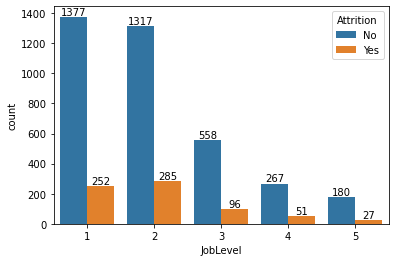

In [63]:
#9.Feature- JobLevel
# Key:Job level at company on a scale of 1 to 5
ax = sns.countplot(x='JobLevel', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

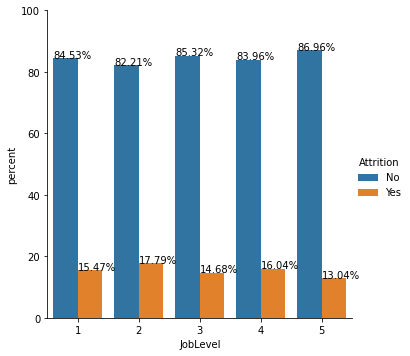

In [64]:
#plotting the attrition rate for each class in the feature 'JobLevel'
x,y = 'JobLevel', 'Attrition'

df9 = df.groupby(x)[y].value_counts(normalize=True)
df9 = df9.mul(100)
df9 = df9.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df9)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [65]:
#JobLevel does not seem to be a strong reason contributing to the attrition. 

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Research Scientist'),
  Text(2, 0, 'Sales Executive'),
  Text(3, 0, 'Human Resources'),
  Text(4, 0, 'Research Director'),
  Text(5, 0, 'Laboratory Technician'),
  Text(6, 0, 'Manufacturing Director'),
  Text(7, 0, 'Sales Representative'),
  Text(8, 0, 'Manager')])

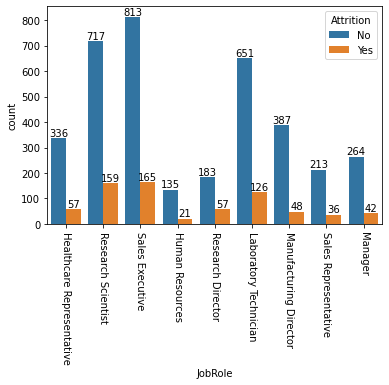

In [66]:
#10.Feature- JobRole
# Key:Name of job role in company
ax = sns.countplot(x='JobRole', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)
    
plt.xticks(rotation=270)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Healthcare Representative'),
  Text(1, 0, 'Human Resources'),
  Text(2, 0, 'Laboratory Technician'),
  Text(3, 0, 'Manager'),
  Text(4, 0, 'Manufacturing Director'),
  Text(5, 0, 'Research Director'),
  Text(6, 0, 'Research Scientist'),
  Text(7, 0, 'Sales Executive'),
  Text(8, 0, 'Sales Representative')])

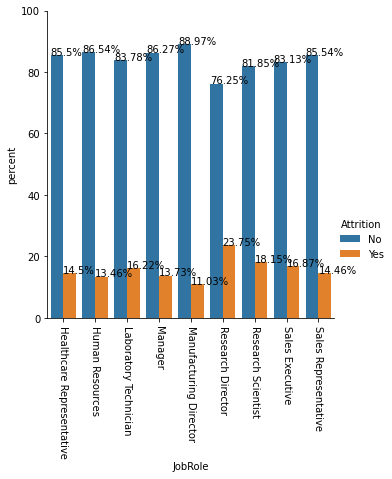

In [67]:
#plotting the attrition rate for each class in the feature 'JobRole'
x,y = 'JobRole', 'Attrition'

df10 = df.groupby(x)[y].value_counts(normalize=True)
df10 = df10.mul(100)
df10 = df10.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df10)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)
    
plt.xticks(rotation=270)

In [68]:
#JobRole of Research Director and Research Scientist has slighly more attrition rate as compared to others.

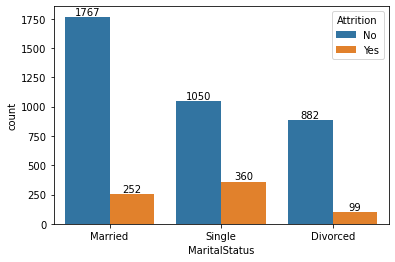

In [69]:
#11.Feature- MaritalStatus
# Key:Marital status of the employee
ax = sns.countplot(x='MaritalStatus', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

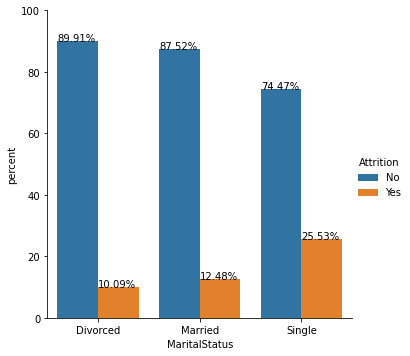

In [70]:
#plotting the attrition rate for each class in the feature 'MaritalStatus'
x,y = 'MaritalStatus', 'Attrition'

df11 = df.groupby(x)[y].value_counts(normalize=True)
df11 = df11.mul(100)
df11 = df11.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df11)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [71]:
#Attrition rate for people with MartialStatus equal to Single is higher than the other two.
#could suggest that single people are more likely to move into another role.

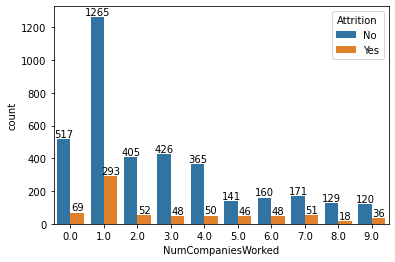

In [72]:
#12.Feature- NumCompaniesWorked
# Key:Total number of companies the employee has worked for
ax = sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

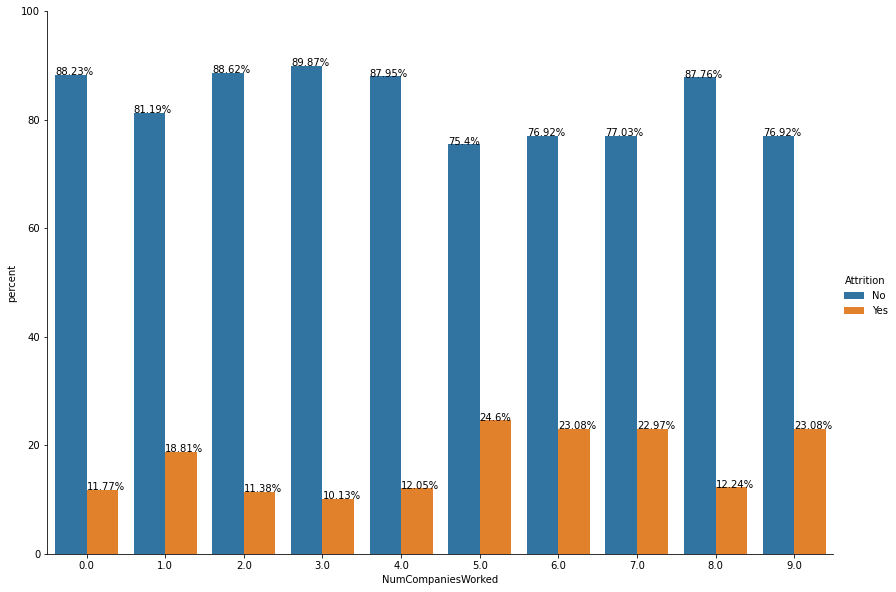

In [73]:
#plotting the attrition rate for each class in the feature 'NumCompaniesWorked'
x,y = 'NumCompaniesWorked', 'Attrition'

df12 = df.groupby(x)[y].value_counts(normalize=True)
df12 = df12.mul(100)
df12 = df12.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df12,height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [74]:
#People worked in just 1 company or more than 5 companies are more likely to change companies.

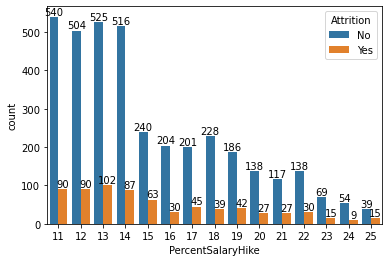

In [75]:
#13.Feature- PercentSalaryHike
# Key:Percent salary hike for last year
ax = sns.countplot(x='PercentSalaryHike', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

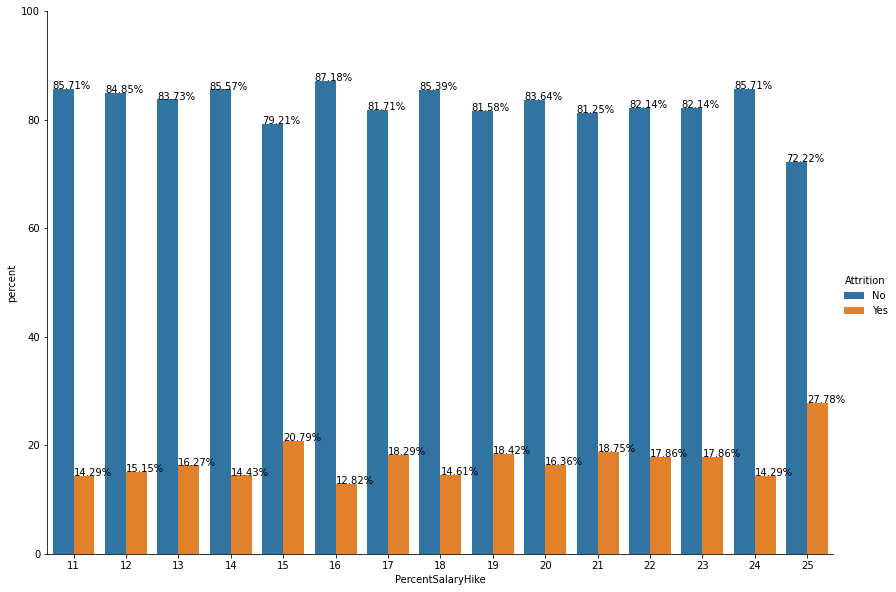

In [76]:
#plotting the attrition rate for each class in the feature 'PercentSalaryHike'
x,y = 'PercentSalaryHike', 'Attrition'

df13 = df.groupby(x)[y].value_counts(normalize=True)
df13 = df13.mul(100)
df13 = df13.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df13, height=8.27, aspect=11.7/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [77]:
#PercentSalaryHike of 25% seem to be slightly higher however,people belonging to this category are fairly less.
#PercentSalaryHike cannot be considered as a strong indicator for determining attrition reasons.

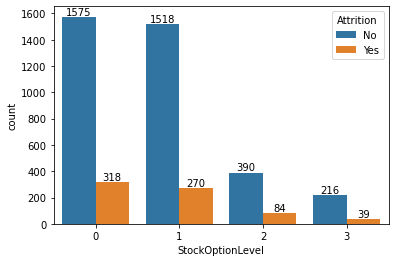

In [78]:
#14.Feature- StockOptionLevel
# Key:Stock option level of the employee
ax = sns.countplot(x='StockOptionLevel', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

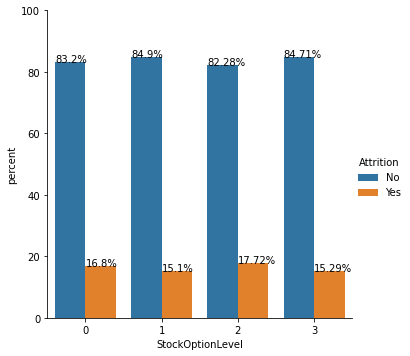

In [79]:
#plotting the attrition rate for each class in the feature 'StockOptionLevel'
x,y = 'StockOptionLevel', 'Attrition'

df14 = df.groupby(x)[y].value_counts(normalize=True)
df14 = df14.mul(100)
df14 = df14.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df14)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [80]:
#StockOptionLevel cannot be considered as a strong indicator for determining attrition reasons.

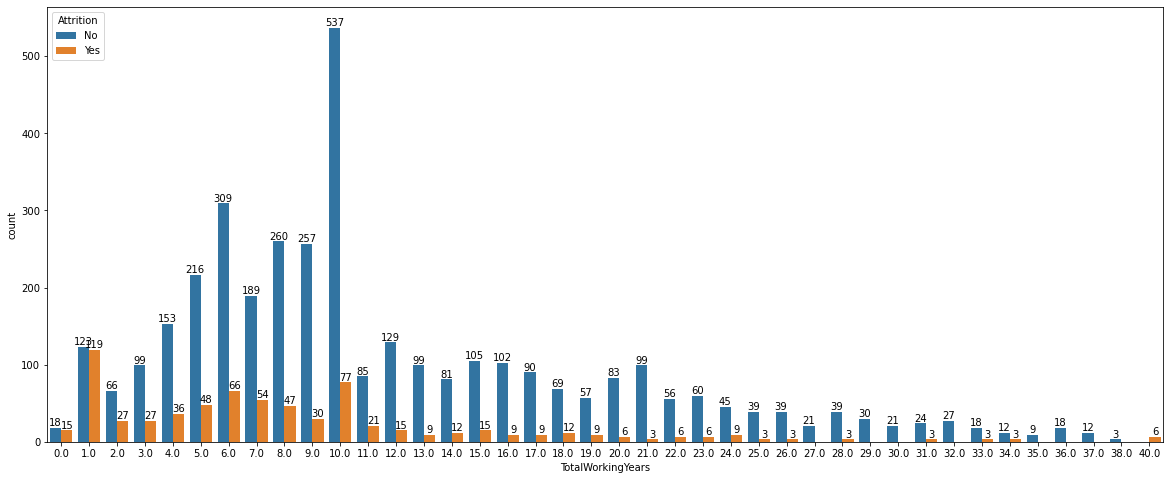

In [81]:
#15.Feature- TotalWorkingYears
# Key:Total number of years the employee has worked so far
plt.figure(figsize=(20,8))
ax = sns.countplot(x='TotalWorkingYears', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


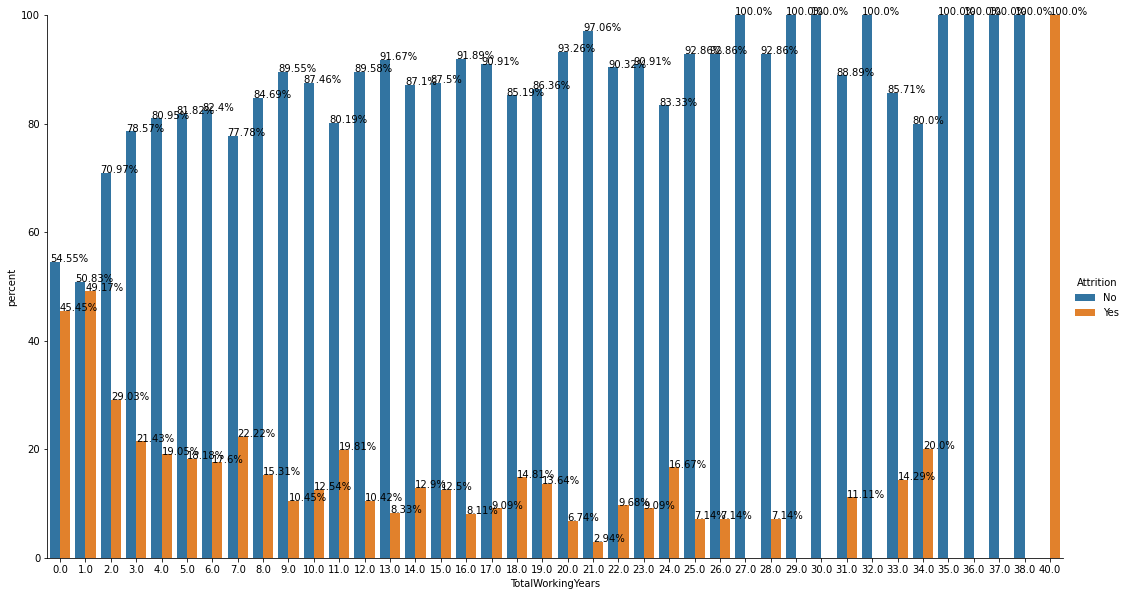

In [82]:
#plotting the attrition rate for each class in the feature 'TotalWorkingYears'
x,y = 'TotalWorkingYears', 'Attrition'

df15 = df.groupby(x)[y].value_counts(normalize=True)
df15 = df15.mul(100)
df15 = df15.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df15, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [83]:
#Employees with 40 TotalWorkingYears must have left the job due to retirement so we can ignore it'
#It is observed that employees with less experience 0-2 years are more likely to leave.

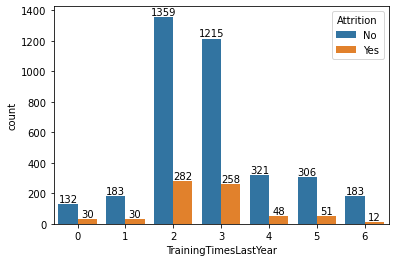

In [84]:
#16.Feature- TrainingTimesLastYear
# Key:Number of times training was conducted for this employee last year
ax = sns.countplot(x='TrainingTimesLastYear', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

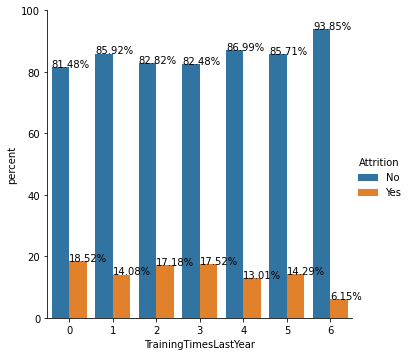

In [85]:
#plotting the attrition rate for each class in the feature 'TrainingTimesLastYear'
x,y = 'TrainingTimesLastYear', 'Attrition'

df16 = df.groupby(x)[y].value_counts(normalize=True)
df16 = df16.mul(100)
df16 = df16.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df16)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [86]:
#TrainingTimesLastYear cannot be considered as a strong indicator for determining attrition reasons.

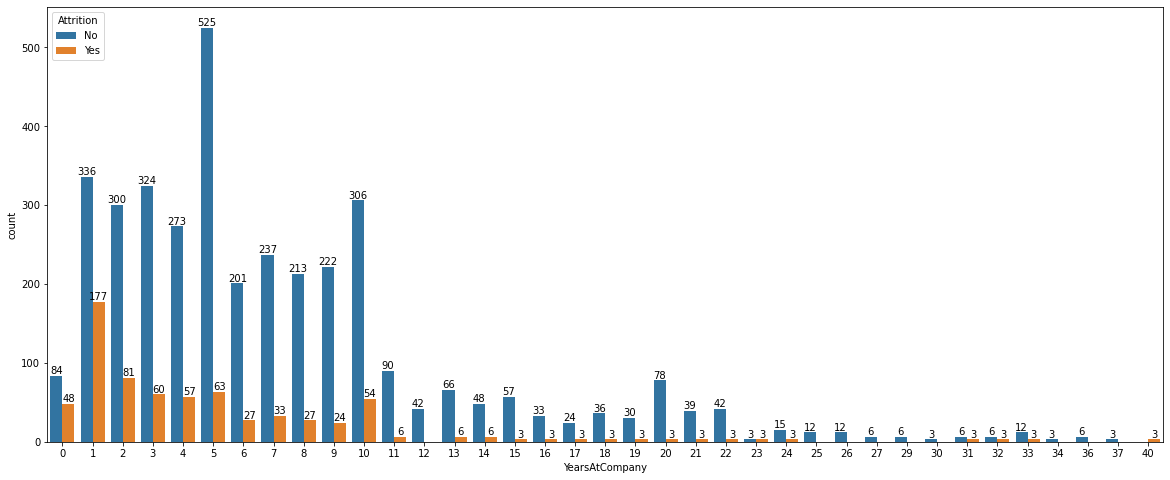

In [87]:
#17.Feature- YearsAtCompany
# Key:Total number of years spent at the company by the employee
plt.figure(figsize=(20,8))
ax = sns.countplot(x='YearsAtCompany', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


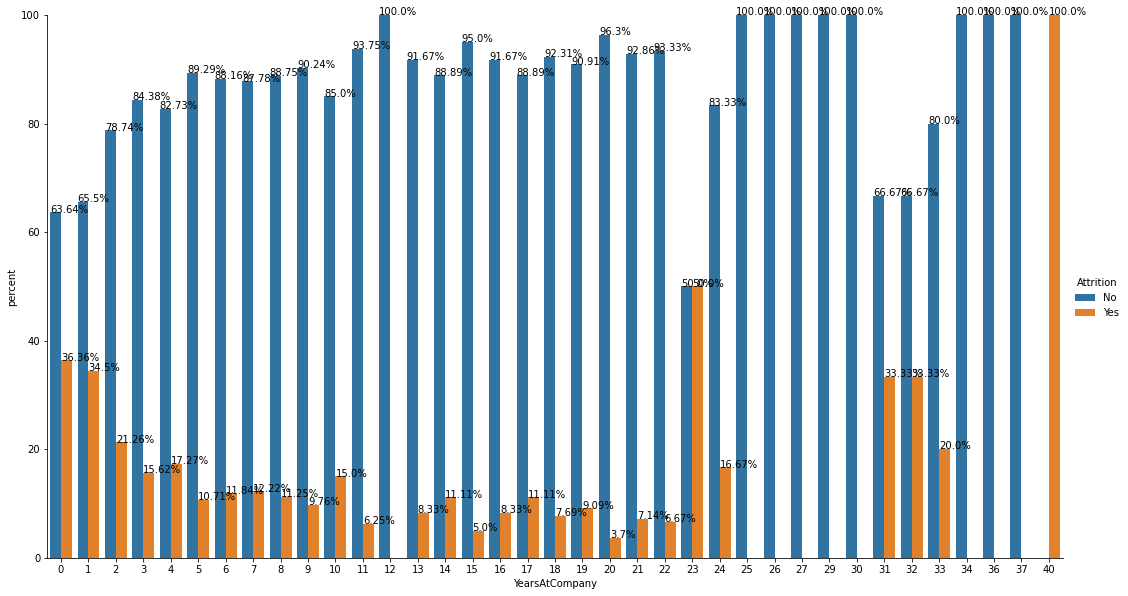

In [88]:
#plotting the attrition rate for each class in the feature 'YearsAtCompany'
x,y = 'YearsAtCompany', 'Attrition'

df17 = df.groupby(x)[y].value_counts(normalize=True)
df17 = df17.mul(100)
df17 = df17.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df17, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [89]:
#People with less YearsAtCompany 0-2 are more likely to leave the company.
#people with larger years at company(23 and beyond) might be leaving due to retirement.

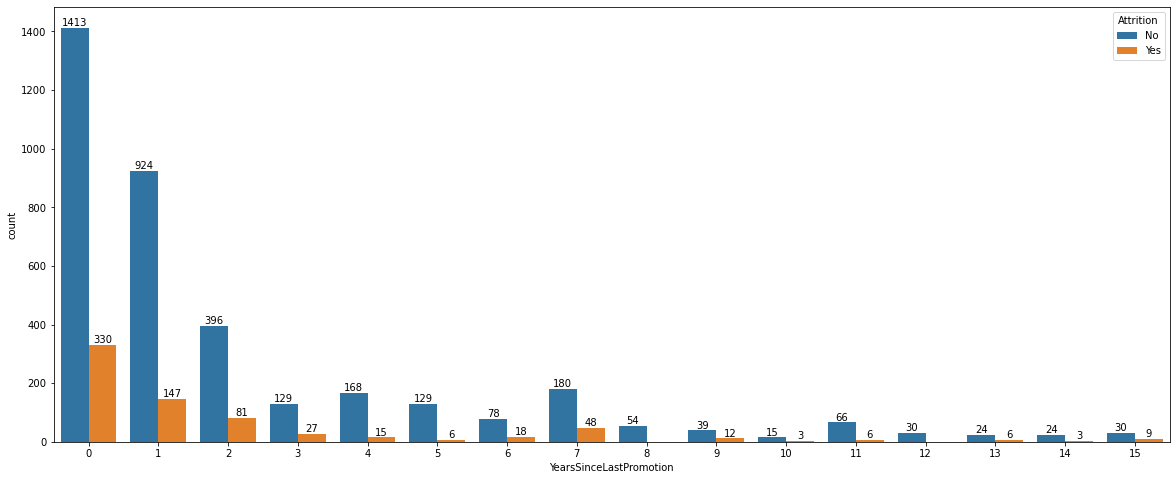

In [90]:
#18.Feature- YearsSinceLastPromotion
# Key:Number of years since last promotion
plt.figure(figsize=(20,8))
ax = sns.countplot(x='YearsSinceLastPromotion', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


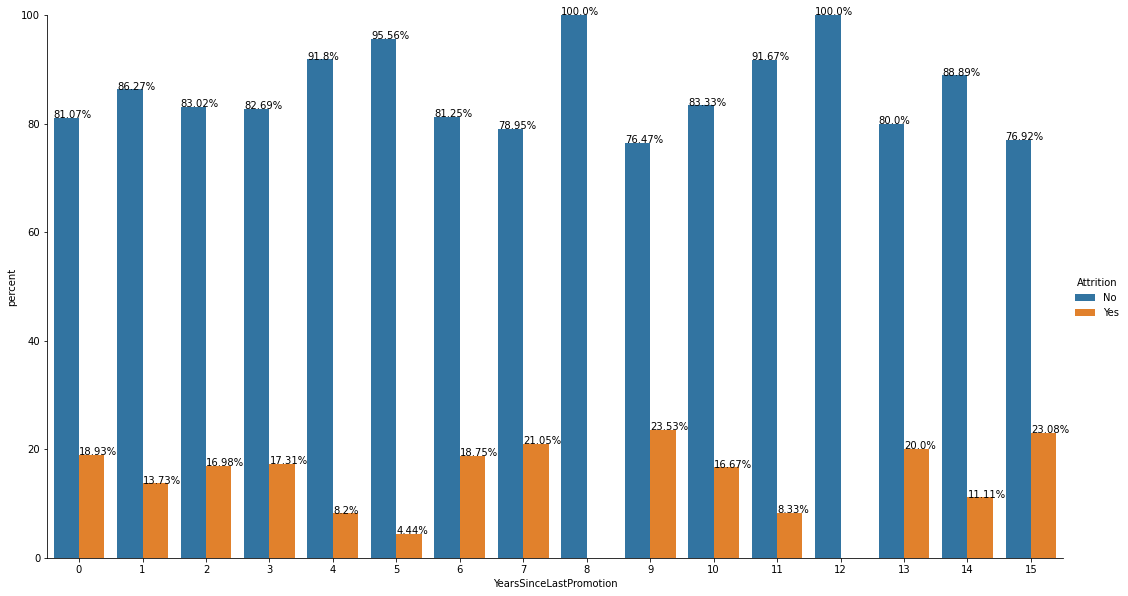

In [91]:
#plotting the attrition rate for each class in the feature 'YearsSinceLastPromotion'
x,y = 'YearsSinceLastPromotion', 'Attrition'

df18 = df.groupby(x)[y].value_counts(normalize=True)
df18 = df18.mul(100)
df18 = df18.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df18, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [92]:
#YearsSinceLastPromotion cannot be considered as a strong indicator for determining attrition reasons.

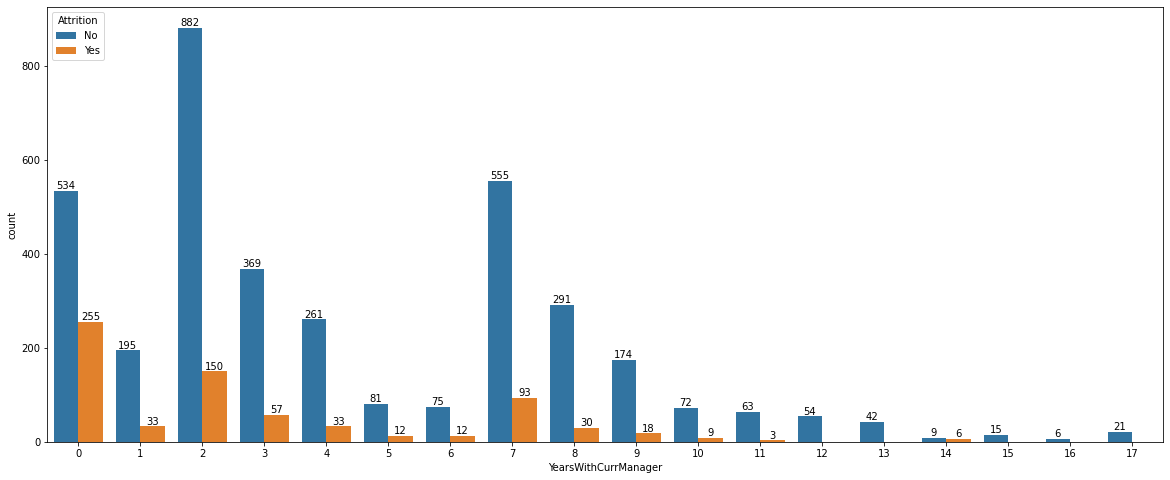

In [93]:
#19.Feature- YearsWithCurrManager
# Key:Number of years under current manager
plt.figure(figsize=(20,8))
ax = sns.countplot(x='YearsWithCurrManager', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


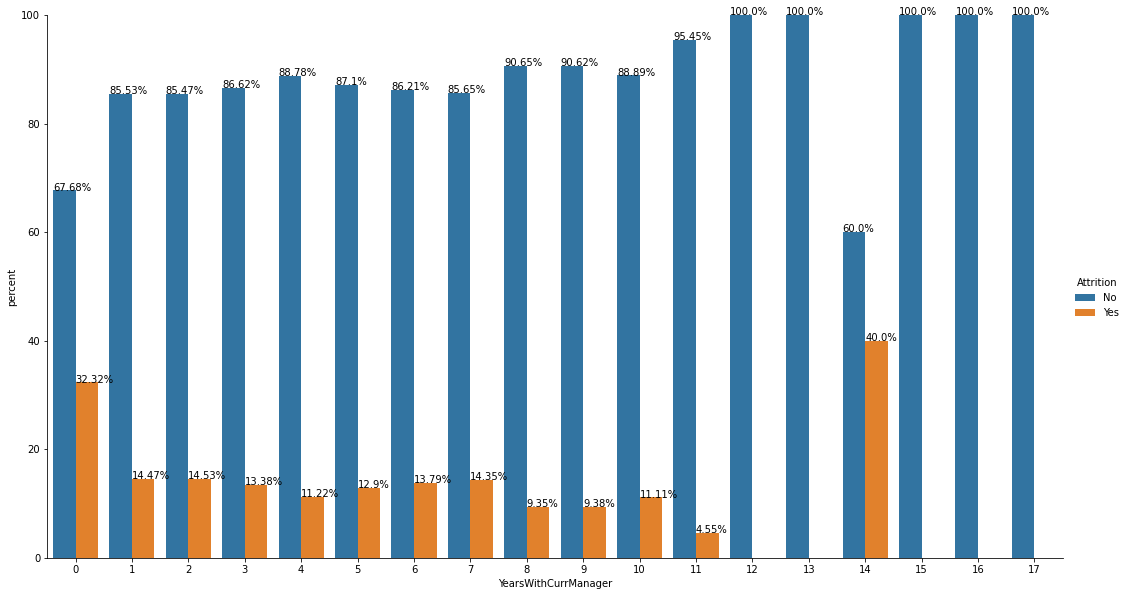

In [94]:
#plotting the attrition rate for each class in the feature 'YearsWithCurrManager'
x,y = 'YearsWithCurrManager', 'Attrition'

df19 = df.groupby(x)[y].value_counts(normalize=True)
df19 = df19.mul(100)
df19 = df19.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df19, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [95]:
#Very less YearsWithCurrManager <1 are more likely to leave.
#Spike at 14 YearsWithCurrManager can be ignored as the people belonging to that class are very less.

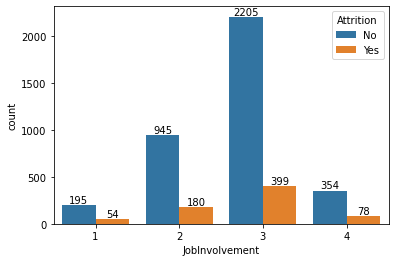

In [96]:
#20.Feature- JobInvolvement
# # Key (1-Low, 2-Medium, 3-High, 4-Very High)
ax = sns.countplot(x='JobInvolvement', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

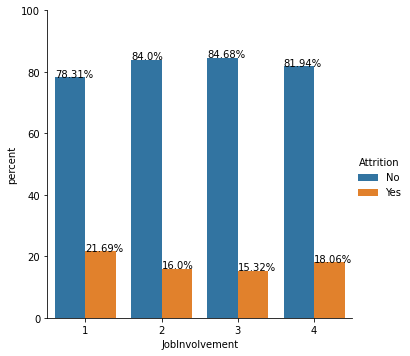

In [97]:
#plotting the attrition rate for each class in the feature 'JobInvolvement'
x,y = 'JobInvolvement', 'Attrition'

df20 = df.groupby(x)[y].value_counts(normalize=True)
df20 = df20.mul(100)
df20 = df20.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df20)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [98]:
#Employees with very low or very high JobInvolvement are more likely to leave.

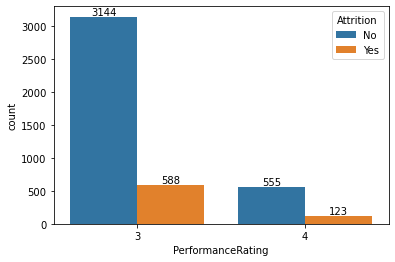

In [99]:
#21.Feature- PerformanceRating
# # Key (1-Low, 2-Good, 3-Excellent, 4-Outstanding)
ax = sns.countplot(x='PerformanceRating', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

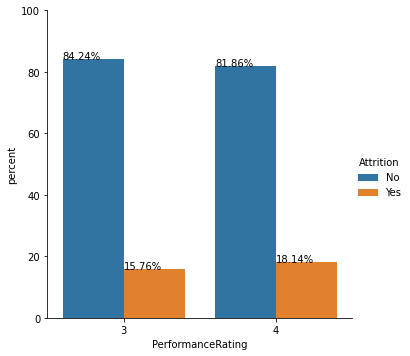

In [100]:
#plotting the attrition rate for each class in the feature 'PerformanceRating'
x,y = 'PerformanceRating', 'Attrition'

df21 = df.groupby(x)[y].value_counts(normalize=True)
df21 = df21.mul(100)
df21 = df21.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df21)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [101]:
#PerformanceRating cannot be considered as a strong indicator for determining attrition reasons.

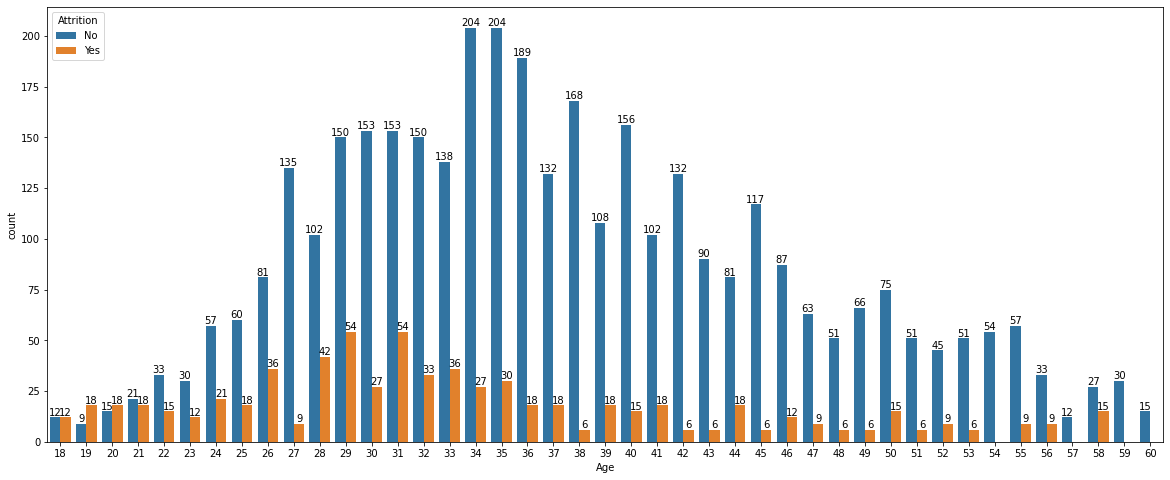

In [102]:
#22.Feature- Age
# Key- Age of the employee
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Age', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


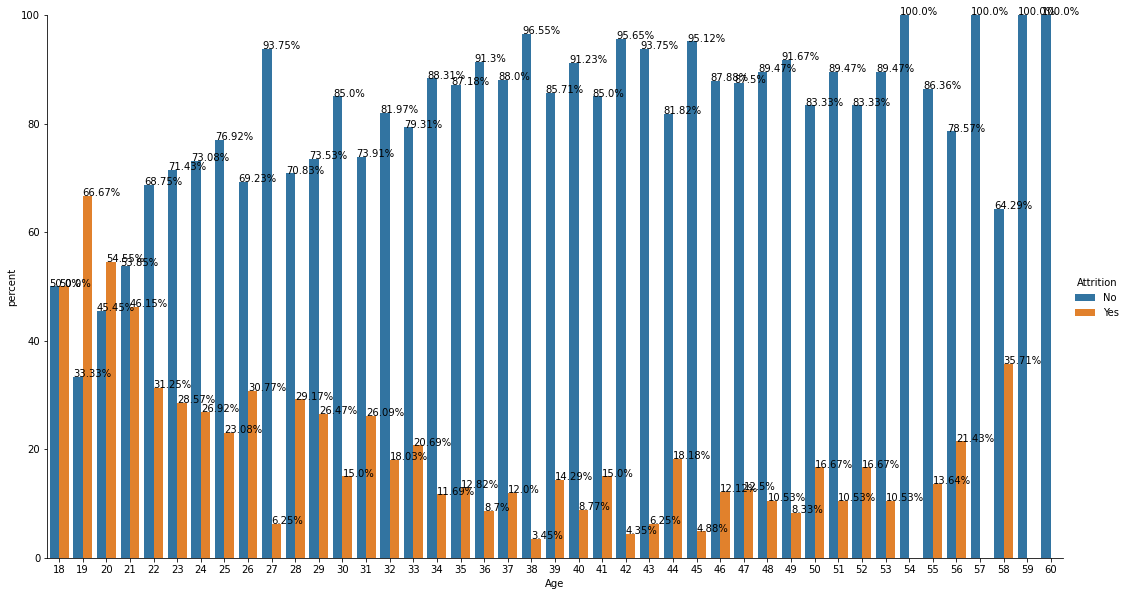

In [103]:
#plotting the attrition rate for each class in the feature 'Age'
x,y = 'Age', 'Attrition'

df22 = df.groupby(x)[y].value_counts(normalize=True)
df22 = df22.mul(100)
df22 = df22.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df22, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [104]:
# Employees of younger age 18-21 are most likely to change jobs.
#As age increases attrition rate gradually decreases with some exceptions.

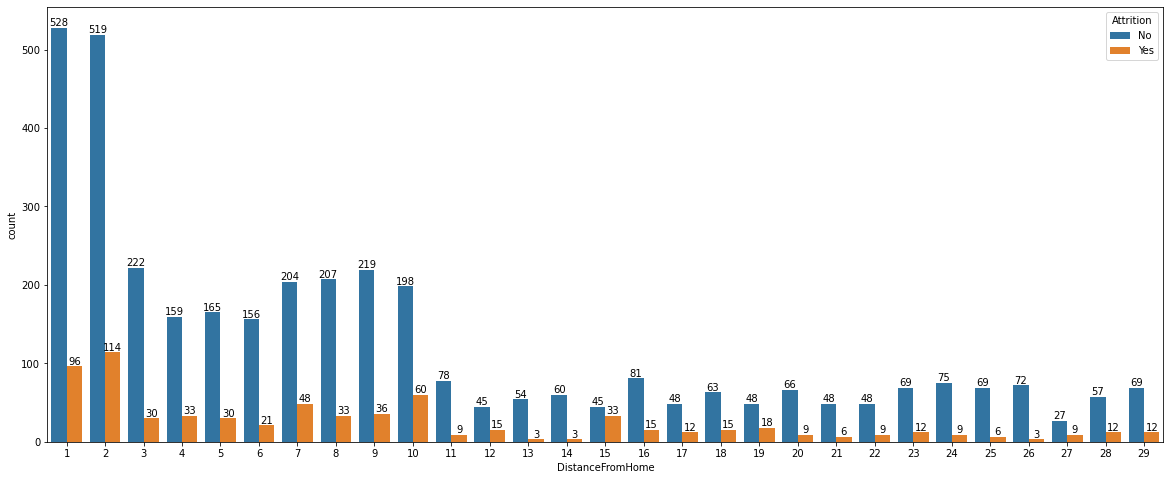

In [105]:
#23.Feature- DistanceFromHome
# Key- Distance from home in kms
plt.figure(figsize=(20,8))
ax = sns.countplot(x='DistanceFromHome', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

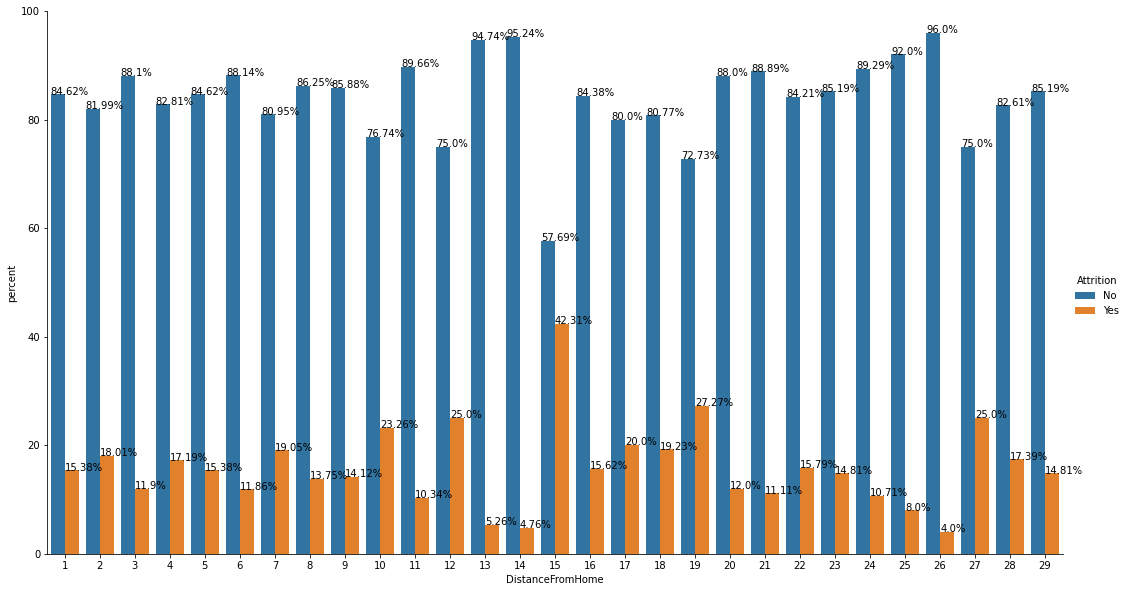

In [106]:
#plotting the attrition rate for each class in the feature 'DistanceFromHome'
x,y = 'DistanceFromHome', 'Attrition'

df23 = df.groupby(x)[y].value_counts(normalize=True)
df23 = df23.mul(100)
df23 = df23.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df23, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [107]:
# A spike is observed at 15 km distance  from home however,
#DistanceFromHome does not seem to be a strong indicator of attrition.

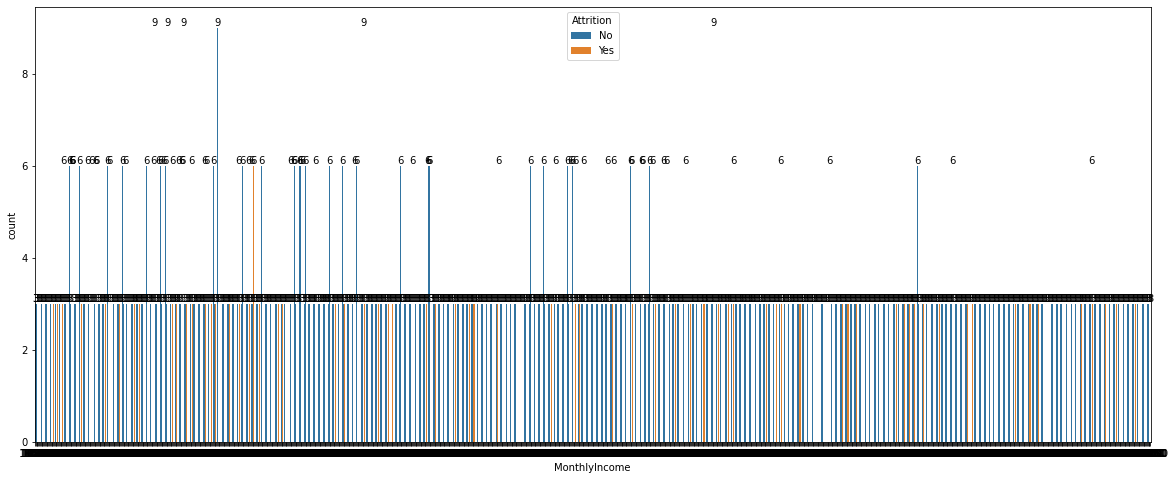

In [108]:
#24.Feature- MonthlyIncome
# Key- Monthly income in rupees per month
plt.figure(figsize=(20,8))
ax = sns.countplot(x='MonthlyIncome', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

In [109]:
#Monthly income seems to be a big range and hence, individual values are difficult to visualise.

In [110]:
df['MonthlyIncome'].min()

10090

In [111]:
df['MonthlyIncome'].max()

199990

In [112]:
df['MonthlyIncome'].mean()

65029.31292517007

In [113]:
#Lets create 10 bins for MonthlyIncome

In [114]:
bin=[0,20000,40000,60000,80000,100000,120000,140000,160000,180000,200000]
labels=[1,2,3,4,5,6,7,8,9,10]

In [115]:
df['Salary Bin']=pd.cut(df['MonthlyIncome'],bin,labels=labels)

In [116]:
df['Salary Bin']

0        7
1        3
2       10
3        5
4        2
        ..
4405     4
4406     2
4407     2
4408     2
4409     3
Name: Salary Bin, Length: 4410, dtype: category
Categories (10, int64): [1 < 2 < 3 < 4 ... 7 < 8 < 9 < 10]

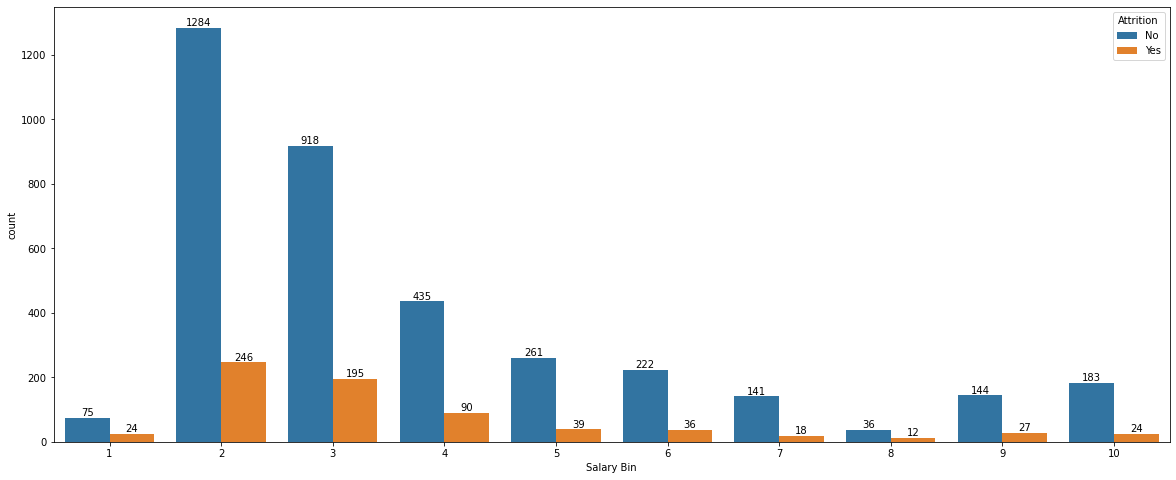

In [117]:
plt.figure(figsize=(20,8))
ax = sns.countplot(x='Salary Bin', hue='Attrition', data=df)
for container in ax.containers:
    ax.bar_label(container)

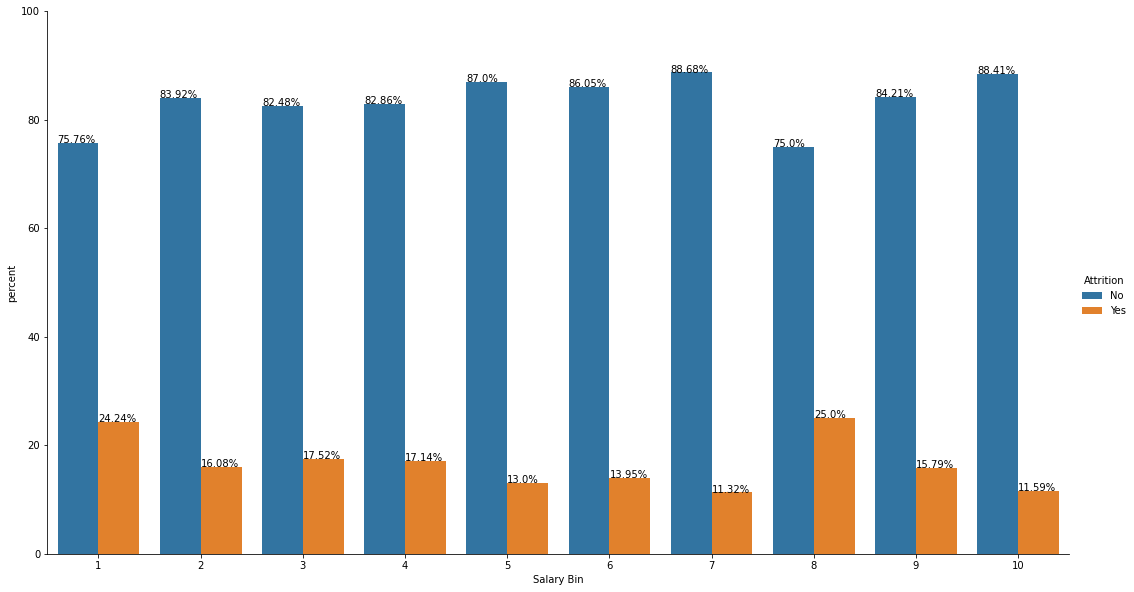

In [118]:
#plotting the attrition rate for each class in the feature 'MonthlyIncome'
x,y = 'Salary Bin', 'Attrition'

df24 = df.groupby(x)[y].value_counts(normalize=True)
df24 = df24.mul(100)
df24 = df24.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df24, height=8.27, aspect=15/8.27)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [119]:
# A slightly higher attrition rate is observed for people with low salaries in the range of 0-20000 rupees.
# The monthly income range of 160000-180000 also shows a slightly higher attrition rate which needs to be investigated further.

In [120]:
#load the 'in_time' data file using pandas
df_in = pd.read_csv(r'C:\Users\PurvaRaut\Desktop\Data Analytics\JCW_HR_Analytics_Project\in_time.csv')

In [121]:
#load the 'out_time' data file using pandas
df_out = pd.read_csv(r'C:\Users\PurvaRaut\Desktop\Data Analytics\JCW_HR_Analytics_Project\out_time.csv')

In [122]:
df_in.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 09:43:45,2015-01-05 10:08:48,2015-01-06 09:54:26,2015-01-07 09:34:31,2015-01-08 09:51:09,2015-01-09 10:09:25,2015-01-12 09:42:53,2015-01-13 10:13:06,...,NaN,2015-12-21 09:55:29,2015-12-22 10:04:06,2015-12-23 10:14:27,2015-12-24 10:11:35,NaN,2015-12-28 10:13:41,2015-12-29 10:03:36,2015-12-30 09:54:12,2015-12-31 10:12:44
1,2,NaN,2015-01-02 10:15:44,2015-01-05 10:21:05,NaN,2015-01-07 09:45:17,2015-01-08 10:09:04,2015-01-09 09:43:26,2015-01-12 10:00:07,2015-01-13 10:43:29,...,2015-12-18 10:37:17,2015-12-21 09:49:02,2015-12-22 10:33:51,2015-12-23 10:12:10,NaN,NaN,2015-12-28 09:31:45,2015-12-29 09:55:49,2015-12-30 10:32:25,2015-12-31 09:27:20
2,3,NaN,2015-01-02 10:17:41,2015-01-05 09:50:50,2015-01-06 10:14:13,2015-01-07 09:47:27,2015-01-08 10:03:40,2015-01-09 10:05:49,2015-01-12 10:03:47,2015-01-13 10:21:26,...,2015-12-18 10:15:14,2015-12-21 10:10:28,2015-12-22 09:44:44,2015-12-23 10:15:54,2015-12-24 10:07:26,NaN,2015-12-28 09:42:05,2015-12-29 09:43:36,2015-12-30 09:34:05,2015-12-31 10:28:39
3,4,NaN,2015-01-02 10:05:06,2015-01-05 09:56:32,2015-01-06 10:11:07,2015-01-07 09:37:30,2015-01-08 10:02:08,2015-01-09 10:08:12,2015-01-12 10:13:42,2015-01-13 09:53:22,...,2015-12-18 10:17:38,2015-12-21 09:58:21,2015-12-22 10:04:25,2015-12-23 10:11:46,2015-12-24 09:43:15,NaN,2015-12-28 09:52:44,2015-12-29 09:33:16,2015-12-30 10:18:12,2015-12-31 10:01:15
4,5,NaN,2015-01-02 10:28:17,2015-01-05 09:49:58,2015-01-06 09:45:28,2015-01-07 09:49:37,2015-01-08 10:19:44,2015-01-09 10:00:50,2015-01-12 10:29:27,2015-01-13 09:59:32,...,2015-12-18 09:58:35,2015-12-21 10:03:41,2015-12-22 10:10:30,2015-12-23 10:13:36,2015-12-24 09:44:24,NaN,2015-12-28 10:05:15,2015-12-29 10:30:53,2015-12-30 09:18:21,2015-12-31 09:41:09


In [123]:
df_out.head()

,Unnamed: 0,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,...,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,2015-01-02 16:56:15,2015-01-05 17:20:11,2015-01-06 17:19:05,2015-01-07 16:34:55,2015-01-08 17:08:32,2015-01-09 17:38:29,2015-01-12 16:58:39,2015-01-13 18:02:58,...,NaN,2015-12-21 17:15:50,2015-12-22 17:27:51,2015-12-23 16:44:44,2015-12-24 17:47:22,NaN,2015-12-28 18:00:07,2015-12-29 17:22:30,2015-12-30 17:40:56,2015-12-31 17:17:33
1,2,NaN,2015-01-02 18:22:17,2015-01-05 17:48:22,NaN,2015-01-07 17:09:06,2015-01-08 17:34:04,2015-01-09 16:52:29,2015-01-12 17:36:48,2015-01-13 18:00:13,...,2015-12-18 18:31:28,2015-12-21 17:34:16,2015-12-22 18:16:35,2015-12-23 17:38:18,NaN,NaN,2015-12-28 17:08:38,2015-12-29 17:54:46,2015-12-30 18:31:35,2015-12-31 17:40:58
2,3,NaN,2015-01-02 16:59:14,2015-01-05 17:06:46,2015-01-06 16:38:32,2015-01-07 16:33:21,2015-01-08 17:24:22,2015-01-09 16:57:30,2015-01-12 17:28:54,2015-01-13 17:21:25,...,2015-12-18 17:02:23,2015-12-21 17:20:17,2015-12-22 16:32:50,2015-12-23 16:59:43,2015-12-24 16:58:25,NaN,2015-12-28 16:43:31,2015-12-29 17:09:56,2015-12-30 17:06:25,2015-12-31 17:15:50
3,4,NaN,2015-01-02 17:25:24,2015-01-05 17:14:03,2015-01-06 17:07:42,2015-01-07 16:32:40,2015-01-08 16:53:11,2015-01-09 17:19:47,2015-01-12 17:13:37,2015-01-13 17:11:45,...,2015-12-18 17:55:23,2015-12-21 16:49:09,2015-12-22 17:24:00,2015-12-23 17:36:35,2015-12-24 16:48:21,NaN,2015-12-28 17:19:34,2015-12-29 16:58:16,2015-12-30 17:40:11,2015-12-31 17:09:14
4,5,NaN,2015-01-02 18:31:37,2015-01-05 17:49:15,2015-01-06 17:26:25,2015-01-07 17:37:59,2015-01-08 17:59:28,2015-01-09 17:44:08,2015-01-12 18:51:21,2015-01-13 18:14:58,...,2015-12-18 17:52:48,2015-12-21 17:43:35,2015-12-22 18:07:57,2015-12-23 18:00:49,2015-12-24 17:59:22,NaN,2015-12-28 17:44:59,2015-12-29 18:47:00,2015-12-30 17:15:33,2015-12-31 17:42:14


In [124]:
#I did Work hours and attendence calculation in excel.
#I subtracted in_time from out_time and then converted the result into hours format.
#Then calculated average of all of the working hours by diving total hours work by the attendence days.

In [125]:
#upload the calculated excel for work_hours and attendence
df_hours = pd.read_excel(r'C:\Users\PurvaRaut\Desktop\Data Analytics\JCW_HR_Analytics_Project\Work_hrs_attendence.xlsx')

In [126]:
df_hours

,EmployeeID,AverageWorkHours,Attendence
0,1,7.373651,232
1,2,7.718969,236
2,3,7.013240,242
3,4,7.193678,235
4,5,8.006175,245
...,...,...,...
4405,4406,8.522277,243
4406,4407,6.092954,241
4407,4408,7.706632,231
4408,4409,9.492595,241


In [127]:
df_new = pd.merge(df,df_hours,on='EmployeeID')

In [128]:
df_new.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Salary Bin,AverageWorkHours,Attendence
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,6,1,0,0,3,3,7,7.373651,232
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,6.0,3,5,1,4,2,4,3,7.718969,236
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,5.0,2,5,0,3,3,3,10,7.013240,242
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,13.0,5,8,7,5,2,3,5,7.193678,235
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,9.0,2,6,0,4,3,3,2,8.006175,245


In [129]:
#drop unnecessary columns
df_new = df_new.drop(columns = ['Over18','StandardHours','EmployeeCount'])

In [130]:
df_new.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Salary Bin,AverageWorkHours,Attendence
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,1.0,6,1,0,0,3,3,7,7.373651,232
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,6.0,3,5,1,4,2,4,3,7.718969,236
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,5.0,2,5,0,3,3,3,10,7.013240,242
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,13.0,5,8,7,5,2,3,5,7.193678,235
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,9.0,2,6,0,4,3,3,2,8.006175,245


In [131]:
df['StandardHours']

0       8
1       8
2       8
3       8
4       8
       ..
4405    8
4406    8
4407    8
4408    8
4409    8
Name: StandardHours, Length: 4410, dtype: int64

In [132]:
df['StandardHours'].nunique()

1

In [133]:
#Standard Working Hours is 8
#If the employee average working hours is greater than 8 then the employee has worked Overtime

In [134]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   EmployeeID               4410 non-null   int64   
 1   EnvironmentSatisfaction  4410 non-null   float64 
 2   JobSatisfaction          4410 non-null   float64 
 3   WorkLifeBalance          4410 non-null   float64 
 4   Age                      4410 non-null   int64   
 5   Attrition                4410 non-null   object  
 6   BusinessTravel           4410 non-null   object  
 7   Department               4410 non-null   object  
 8   DistanceFromHome         4410 non-null   int64   
 9   Education                4410 non-null   int64   
 10  EducationField           4410 non-null   object  
 11  Gender                   4410 non-null   object  
 12  JobLevel                 4410 non-null   int64   
 13  JobRole                  4410 non-null   object  
 14  MaritalS

In [135]:
#add column which states if the employee has overworked
df_new.loc[df_new['AverageWorkHours'] <= 8,'OverWorked'] = 'No'
df_new.loc[df_new['AverageWorkHours'] > 8,'OverWorked'] = 'Yes'

In [136]:
df_new.head()

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,...,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,JobInvolvement,PerformanceRating,Salary Bin,AverageWorkHours,Attendence,OverWorked
0,1,3.0,4.0,2.0,51,No,Travel_Rarely,Sales,6,2,...,6,1,0,0,3,3,7,7.373651,232,No
1,2,3.0,2.0,4.0,31,Yes,Travel_Frequently,Research & Development,10,1,...,3,5,1,4,2,4,3,7.718969,236,No
2,3,2.0,2.0,1.0,32,No,Travel_Frequently,Research & Development,17,4,...,2,5,0,3,3,3,10,7.013240,242,No
3,4,4.0,4.0,3.0,38,No,Non-Travel,Research & Development,2,5,...,5,8,7,5,2,3,5,7.193678,235,No
4,5,4.0,1.0,3.0,32,No,Travel_Rarely,Research & Development,10,1,...,2,6,0,4,3,3,2,8.006175,245,Yes


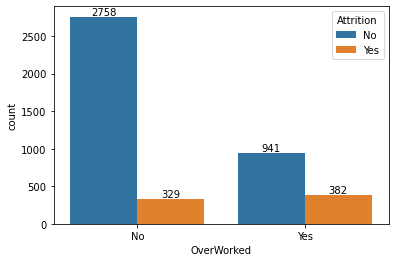

In [137]:
#25.Feature- OverWorked
# Key- States if the employee has worked for more than Standard hours of 8.
ax = sns.countplot(x='OverWorked', hue='Attrition', data=df_new)
for container in ax.containers:
    ax.bar_label(container)

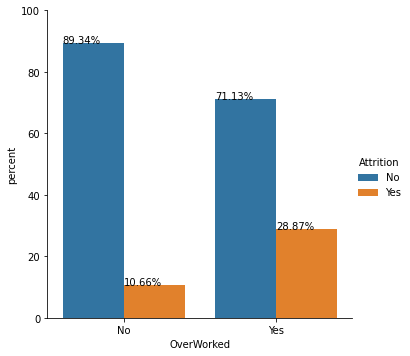

In [138]:
#plotting the attrition rate for each class in the feature 'OverWorked'
x,y = 'OverWorked', 'Attrition'

df25 = df_new.groupby(x)[y].value_counts(normalize=True)
df25 = df25.mul(100)
df25 = df25.rename('percent').reset_index()

g = sns.catplot(x=x,y='percent',hue=y,kind='bar',data=df25)
g.ax.set_ylim(0,100)

for p in g.ax.patches:
    txt = str(p.get_height().round(2)) + '%'
    txt_x = p.get_x() 
    txt_y = p.get_height()
    g.ax.text(txt_x,txt_y,txt)

In [139]:
#As we compare attrition rate for OverWorked feature,we observe that percentage of employees who have overworked is higher.
#This can be considered as a strong reason for attrition.